In [10]:

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp
from scipy import stats

import model as m

import copy



In [15]:
params_none = {'R0':2, 'delay':1000, 'loss':1, 'iso_fac':0.2, 'test_fac':0.1}
params_slow = {'R0':2, 'delay':48, 'loss':0.2, 'iso_fac':0.2, 'test_fac':0.1}
params_fast = {'R0':2, 'delay':12, 'loss':0.2, 'iso_fac':0.2, 'test_fac':0.1}

tree_none = m.Tree(params_none, None)
tree_slow = m.Tree(params_slow, None)
tree_fast = m.Tree(params_fast, None)

scenarios = [ (tree_none, "No contact tracing","none"),\
(tree_slow, "Slow contact tracing","slow"),\
(tree_fast, "Fast contact tracing","fast")]

In [24]:


num_samples = 100
days = 30
results = {}

for scen in scenarios:
    print(scen[1])
    results[scen[2]] = {'infected' : [], 'spontaneous' : [], 'tested' : []}
    for iter in range(num_samples):
        tree = copy.deepcopy(scen[0])
        tree.run_sim(days, False)
        for (desc, num) in tree.totals.items():
            results[scen[2]][desc].append(num)
        print(tree.totals['infected'], end = ' ')
    print()

No contact tracing
204 78 39 203 45 128 79 0 202 109 233 11 243 181 134 81 61 1 51 287 179 30 1 66 134 103 196 28 65 36 164 111 43 100 120 97 117 0 96 34 49 18 34 15 87 193 31 162 232 207 104 63 142 158 0 46 89 22 0 55 57 116 46 35 27 61 95 69 11 259 20 428 128 32 47 217 142 110 10 0 189 1 91 89 6 81 25 0 62 0 61 26 38 133 90 105 89 0 71 132 
Slow contact tracing
146 0 295 0 24 59 38 309 26 196 15 144 0 14 115 33 1 229 19 41 101 107 62 86 14 121 42 84 2 37 0 243 112 60 2 4 26 0 1 183 54 18 1 69 211 10 102 35 37 0 2 2 0 18 125 1 1 0 1 14 37 4 2 1 0 0 132 1 1 18 10 115 34 69 45 34 7 6 98 20 92 19 1 34 1 280 0 175 13 28 0 98 51 0 0 0 270 32 246 0 
Fast contact tracing
69 167 186 115 7 44 163 112 2 0 5 114 0 64 69 3 167 50 0 62 20 95 0 1 3 91 3 34 98 38 0 0 51 0 0 17 0 0 55 14 48 28 55 56 19 75 37 51 0 74 48 59 1 20 71 0 0 17 156 72 183 119 81 14 66 44 2 190 27 14 8 53 0 1 76 51 35 0 117 65 106 248 252 128 62 43 134 11 70 0 200 24 0 111 24 8 62 47 20 28 


In [8]:
# results['fast']
# results['slow']
# results['none']


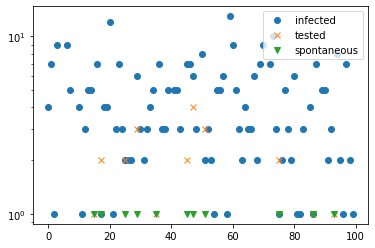

In [11]:

plt.figure()
plt.semilogy(results['fast']['infected'], 'o', label='infected')
plt.semilogy(results['fast']['tested'], 'x', label='tested')
plt.semilogy(results['fast']['spontaneous'], 'v', label='spontaneous')

plt.legend()

In [33]:
log_infect_fast = np.log10(np.array(results['fast']['infected']) + 1)
log_infect_slow = np.log10(np.array(results['slow']['infected']) + 1)
log_infect_none = np.log10(np.array(results['none']['infected']) + 1)

(array([ 8.,  3.,  0.,  0.,  1.,  1.,  3.,  3., 11., 10., 14., 19., 14.,
        11.,  2.]),
 array([0.        , 0.17549715, 0.35099431, 0.52649146, 0.70198861,
        0.87748576, 1.05298292, 1.22848007, 1.40397722, 1.57947438,
        1.75497153, 1.93046868, 2.10596583, 2.28146299, 2.45696014,
        2.63245729]),
 <a list of 15 Patch objects>)

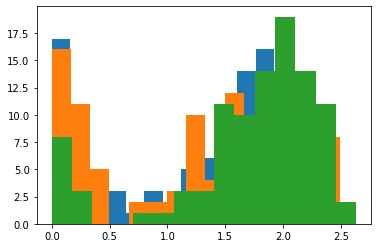

In [34]:
plt.hist(log_infect_fast,15)
plt.hist(log_infect_slow,15)
plt.hist(log_infect_none,15)